In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

In [2]:
def best_h(df):
    return df.groupby(['id'], as_index=False).apply(lambda x: x.loc[x['SHD_pattern'].idxmin()])

def worst_h(df):
    return df.groupby(['id'], as_index=False).apply(lambda x: x.loc[x['SHD_pattern'].idxmax()])

## Tables

In [3]:
df_all = pd.read_csv('./results/sachs/joint_benchmarks.csv', index_col=0)
df_all['id'] = df_all.apply(lambda x: x['id'].upper(), axis=1)

df_best = best_h(df_all)
df_best['SHD'] = df_best['SHD_pattern']

df_worst = worst_h(df_all)
df_worst['SHD'] = df_worst['SHD_pattern']

In [4]:
df_best[['id', 'SHD']]

,id,SHD
0,ANM,15
1,CAM,9
2,FCI,9
3,FGES,9
4,LINGAM,9
5,NOTEARS,8
6,NOTEARS_MLP,8
7,PC,9


In [5]:
df_merged = df_best.merge(df_worst, on='id', suffixes=['_best', '_worst'])

display(df_merged[['id', 'SHD_best', 'SHD_worst']])

,id,SHD_best,SHD_worst
0,ANM,15,25
1,CAM,9,32
2,FCI,9,21
3,FGES,9,15
4,LINGAM,9,12
5,NOTEARS,8,39
6,NOTEARS_MLP,8,33
7,PC,9,22


## Distributions

In [6]:
df = pd.read_csv('./results/sachs/joint_benchmarks.csv', index_col=0)
algs = df['id'].unique()
algs.sort()

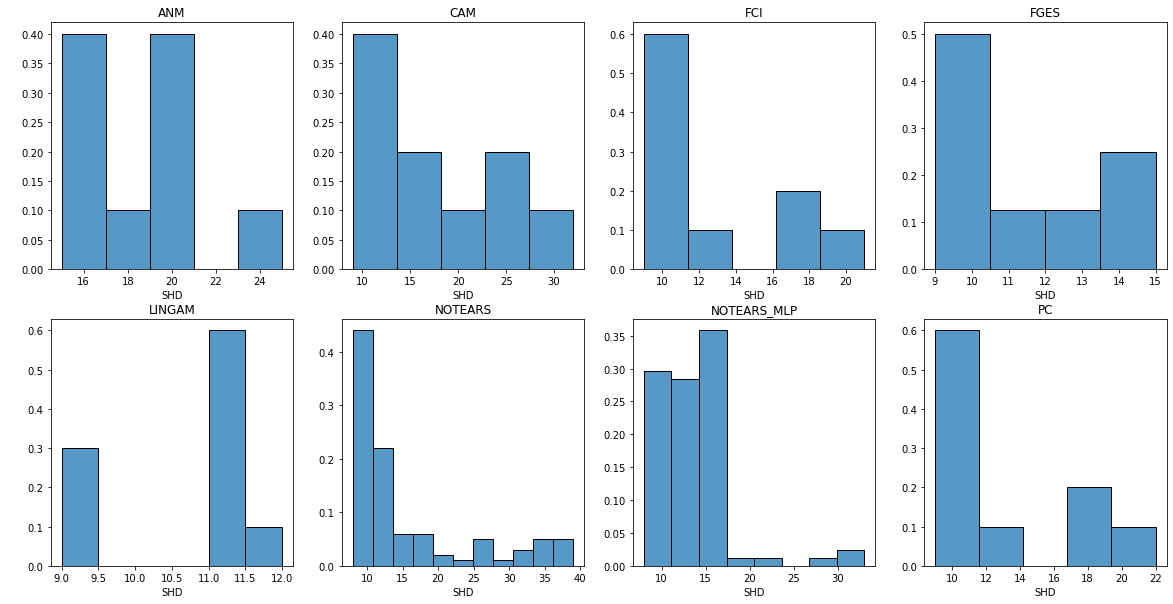

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for ax, alg in zip(axes, algs):
    ax.set_title(alg.upper())
    ax.set_xlabel('SHD')
    ax.set_ylabel(' ')
    sns.histplot(df.loc[df['id'] == alg, 'SHD_pattern'], ax=ax, stat='probability')